<h1 style="text-align: center;">
    Marketing Analytics: Customer Segmentation
</h1>  

## 1. Giới thiệu về challenge

### Bối Cảnh
Việc phân tích hiệu quả quảng cáo (***ad performance***) và tối ưu ngân sách marketing là yếu tố then chốt giúp doanh nghiệp tăng trưởng bền vững.  
Dựa trên bộ dữ liệu thực tế từ nhiều chiến dịch quảng cáo đa kênh, đa mục tiêu, đa phân khúc khách hàng và nhiều địa phương/ngôn ngữ khác nhau, bạn sẽ khám phá các yếu tố tạo nên ROI cao, nhắm đúng đối tượng và cải thiện conversion rate.  

### Mô Tả Dữ Liệu

#### Tổng Quan
- Bộ dữ liệu bao gồm thông tin chi tiết về **2.206 khách hàng** của công ty XYZ, tập trung vào hồ sơ khách hàng, mức độ tiêu dùng sản phẩm, hành vi phản hồi với các chiến dịch marketing và hiệu quả của các kênh bán hàng.  
- Bộ dữ liệu này lý tưởng cho việc phân tích hành vi khách hàng, đo lường mức độ thành công của các chiến dịch quảng cáo, xây dựng mô hình dự đoán phản hồi khách hàng và đề xuất chiến lược marketing cá nhân hóa.

#### Cấu Trúc Dữ Liệu
Bộ dữ liệu bao gồm nhiều cột, mỗi cột phản ánh một khía cạnh quan trọng về khách hàng hoặc hoạt động marketing:

| **Cột**              | **Mô tả**                                                                 |
|:---------------------|---------------------------------------------------------------------------|
| AcceptedCmp1–5       | Khách hàng có chấp nhận ưu đãi trong 5 chiến dịch đầu tiên (1: Có, 0: Không) |
| AcceptedCmpOverall   | Tổng số chiến dịch đã được khách hàng chấp nhận                           |
| Response             | Khách hàng có chấp nhận ưu đãi trong chiến dịch gần nhất hay không         |
| Complain             | Khách hàng có khiếu nại trong 2 năm gần nhất (1: Có, 0: Không)             |
| Customer_Days        | Số ngày kể từ khi khách hàng đăng ký                                      |
| Education_*          | Trình độ học vấn của khách hàng (2n Cycle, Basic, Graduation, Master, PhD) |
| Marital_*            | Tình trạng hôn nhân (Divorced, Married, Single, Together, Widow)           |
| Kidhome              | Số trẻ nhỏ trong hộ gia đình khách hàng                                    |
| Teenhome             | Số thanh thiếu niên trong hộ gia đình khách hàng                           |
| Income               | Thu nhập hằng năm của hộ gia đình                                          |
| MntFishProducts      | Chi tiêu cho sản phẩm cá trong 2 năm gần nhất                              |
| MntMeatProducts      | Chi tiêu cho sản phẩm thịt trong 2 năm gần nhất                            |
| MntFruits            | Chi tiêu cho sản phẩm trái cây trong 2 năm gần nhất                        |
| MntSweetProducts     | Chi tiêu cho sản phẩm bánh kẹo trong 2 năm gần nhất                        |
| MntWines             | Chi tiêu cho sản phẩm rượu vang trong 2 năm gần nhất                       |
| MntGoldProds         | Chi tiêu cho sản phẩm vàng trong 2 năm gần nhất                            |
| NumDealsPurchases    | Số lần mua hàng với khuyến mãi                                             |
| NumCatalogPurchases  | Số lần mua hàng qua catalog                                                |
| NumStorePurchases    | Số lần mua hàng trực tiếp tại cửa hàng                                     |
| NumWebPurchases      | Số lần mua hàng qua website công ty                                        |
| NumWebVisitsMonth    | Số lần khách hàng ghé website trong tháng gần nhất                         |
| Recency              | Số ngày kể từ lần mua hàng gần nhất                                        |
| Age                  | Tuổi của khách hàng                                                        |
| MntTotal             | Tổng chi tiêu cho tất cả sản phẩm                                          |
| MntRegularProds      | Tổng chi tiêu cho các sản phẩm thông thường                                |


## 2. Tiền xử lý dữ liệu

### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
import warnings
import matplotlib.ticker as mtick
warnings.filterwarnings('ignore')

In [2]:
filepath = "../dataset/ifood_df.csv"
data = pd.read_csv(filepath)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


### Dữ liệu có bao nhiêu cột? Bao nhiêu dòng?

In [3]:
print("Dữ liệu có", data.shape[0], "dòng và", data.shape[1], "cột")

Dữ liệu có 2205 dòng và 39 cột


### Dữ liệu có bị thiếu không? Nếu có thì in ra tên cột và số lượng thiếu tương ứng.

In [4]:
null_counts = data.isnull().sum()

if (null_counts == 0).all():
    print("Dữ liệu không bị thiếu.")
else:
    print("Dữ liệu bị thiếu ở các cột sau:")
    print(null_counts[null_counts > 0])

Dữ liệu không bị thiếu.


### Từng cột đang có kiểu dữ liệu là gì? Có phù hợp hay chưa?

In [5]:
# Tự động tối ưu kiểu dữ liệu
# data = data.convert_dtypes()
# Xuất kiểu dữ liệu sau khi tối ưu
def df_types(data):
    return pd.DataFrame({ "Data Type": data.dtypes.astype(str) })
df_types(data)

,Data Type
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64
MntGoldProds,int64


#### Xử Lý Dữ Liệu Category  

Các cột category đều đã được **chuyển thành dạng one-hot encoding**. Điều này thuận tiện khi áp dụng các thuật toán Machine Learning, nhưng lại khiến số lượng cột tăng lên đáng kể, gây khó khăn cho các phân tích cơ bản.  

Do đó, tôi sẽ tiến hành **gộp lại các cột liên quan thành nhóm** để thuận tiện cho việc quan sát và trực quan hóa:  

- **Trình độ học vấn (`Education`)**:  
  Gộp từ các cột one-hot `education_2n Cycle`, `education_Basic`, `education_Graduation`, `education_Master`, `education_PhD`.  

- **Tình trạng hôn nhân (`Marital`)**:  
  Gộp từ các cột one-hot `marital_Divorced`, `marital_Married`, `marital_Single`, `marital_Together`, `marital_Widow`.  

- **Chiến dịch quảng cáo đã chấp nhận (`AcceptedCmp`)**:  
  Tạo cột tổng hợp `AcceptedCmpTotal` bằng cách cộng các cột `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`.  

- **Tổng chi tiêu (`MntTotal`)**:  
  Gộp các khoản chi tiêu sản phẩm: `MntFishProducts`, `MntMeatProducts`, `MntFruits`, `MntSweetProducts`, `MntW

In [6]:
# Copy dữ liệu gốc để xử lý
pre_data = data.copy()

# Gộp Education
pre_data["Education"] = (
    pre_data[["education_2n Cycle", "education_Basic", "education_Graduation", "education_Master", "education_PhD"]]
    .idxmax(axis=1)
    .str.replace("education_", "")
)

# Gộp Marital
pre_data["Marital"] = (
    pre_data[["marital_Divorced", "marital_Married", "marital_Single", "marital_Together", "marital_Widow"]]
    .idxmax(axis=1)
    .str.replace("marital_", "")
)

# Drop các cột gốc đã gộp
pre_data = pre_data.drop(
    columns=[
        "education_2n Cycle", "education_Basic", "education_Graduation", "education_Master", "education_PhD",
        "marital_Divorced", "marital_Married", "marital_Single", "marital_Together", "marital_Widow"
    ]
)

pre_data.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Education,Marital
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,1529,1441,0,Graduation,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,21,15,0,Graduation,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,734,692,0,Graduation,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,48,43,0,Graduation,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,407,392,0,PhD,Married


In [7]:
# Chuyển toàn bộ cột object sang string dtype
obj_cols = pre_data.select_dtypes(include='object').columns
pre_data[obj_cols] = pre_data[obj_cols].astype('string')

In [8]:
print("Dữ liệu sau chuyển đổi")
df_types(pre_data)

Dữ liệu sau chuyển đổi


,Data Type
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64
MntGoldProds,int64


### Dữ liệu có trùng lặp không

In [9]:
if pre_data.duplicated().any():
    print("Dữ liệu có trùng lặp")
else:
    print("Dữ liệu không có trùng lặp")

Dữ liệu có trùng lặp


In [10]:
pre_data = pre_data.drop_duplicates()

### Với mỗi cột có kiểu dữ liệu được phân bố như thế nào?

#### Đối với cột dữ liệu dạng số

In [11]:
def col_info(col, array):
    temp = np.array(array[col])
    temp = temp[np.invert(np.isnan(temp))]
    data = []
    # min
    data.append(np.min(temp))
    # 3 quartile
    for i in range(25, 100, 25):
        data.append(np.percentile(temp, i, interpolation='linear'))
    # max
    data.append(np.max(temp))
    return data

In [12]:
num_col_info_df = pd.DataFrame(index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
for i in pre_data._get_numeric_data():
    num_col_info_df[i] = col_info(i, pre_data)
num_col_info_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall
min,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,24.0,2159.0,4.0,-283.0,0.0
lower_quartile,35416.0,0.0,0.0,24.0,24.0,2.0,16.0,3.0,1.0,9.0,1.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,43.0,2337.0,55.0,42.0,0.0
median,51412.0,0.0,0.0,49.0,178.0,8.0,68.0,12.0,8.0,25.0,2.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,50.0,2511.0,343.0,288.0,0.0
upper_quartile,68274.0,1.0,1.0,74.0,507.0,33.0,230.0,50.0,34.0,56.0,3.0,6.0,4.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,61.0,2688.0,964.0,883.0,0.0
max,113734.0,2.0,2.0,99.0,1493.0,199.0,1725.0,259.0,262.0,321.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,11.0,1.0,80.0,2858.0,2491.0,2458.0,4.0


Ở đây có 2 cột chỉ có 1 giá trị duy nhất là `Z_CostContact` và `Z_Revenue`, đồng thời cũng không có giải thích ý nghĩa của cột. Ta sẽ thực hiện drop luôn 2 cột này.

In [13]:
# Drop các cột vô nghĩa
pre_data = pre_data.drop(columns=["Z_CostContact", "Z_Revenue"])
data = data.drop(columns=["Z_CostContact", "Z_Revenue"])

Ta vẽ biểu đồ `Boxplot` và `Violinplot` để thể hiện sự phân bố dữ liệu với các cột dạng số. Ở đây sẽ có loại trừ các cột chỉ có giá trị 0, 1 đại diện cho True, False.

In [14]:
# Chọn các cột số
numeric_cols = [
    col for col in num_col_info_df.columns
    if num_col_info_df.loc['max', col] != 1 and col not in ["Z_CostContact", "Z_Revenue"]
]

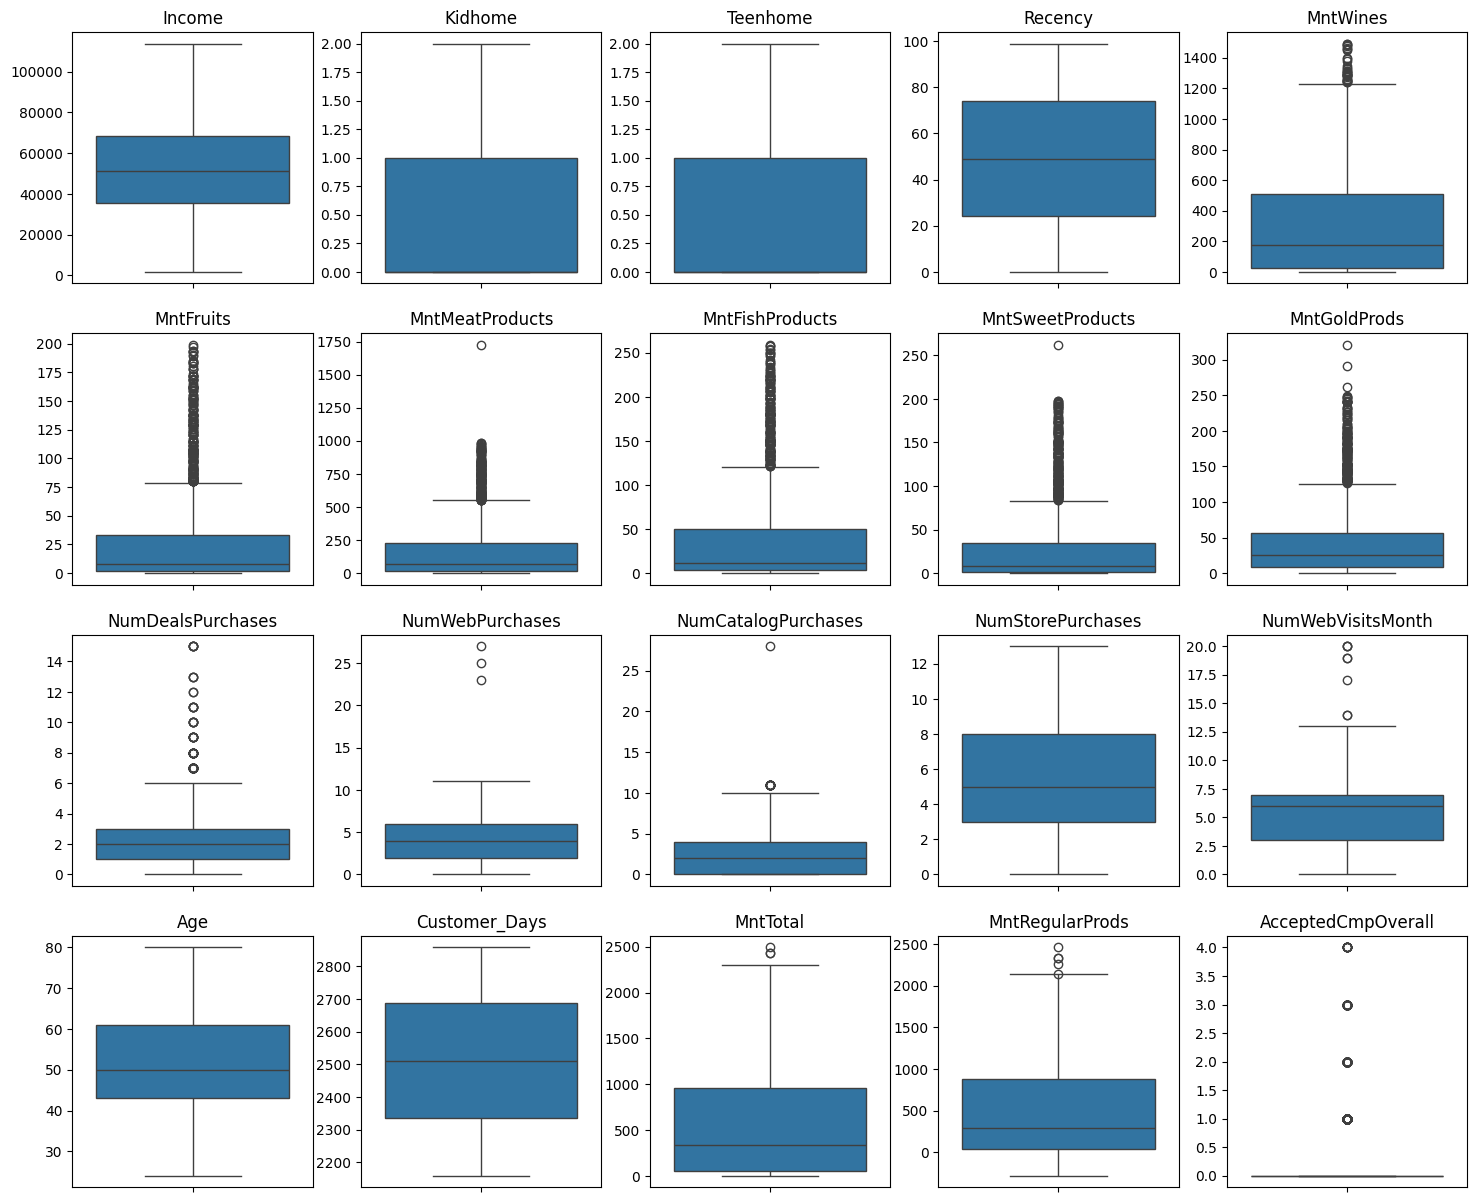

In [15]:
fig, axs = plt.subplots(4, 5, figsize=(18, 15))
axs = axs.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(data = pre_data, y = pre_data[col], ax = axs[i])
    axs[i].set_ylabel("")
    axs[i].set_title(col)
plt.show()

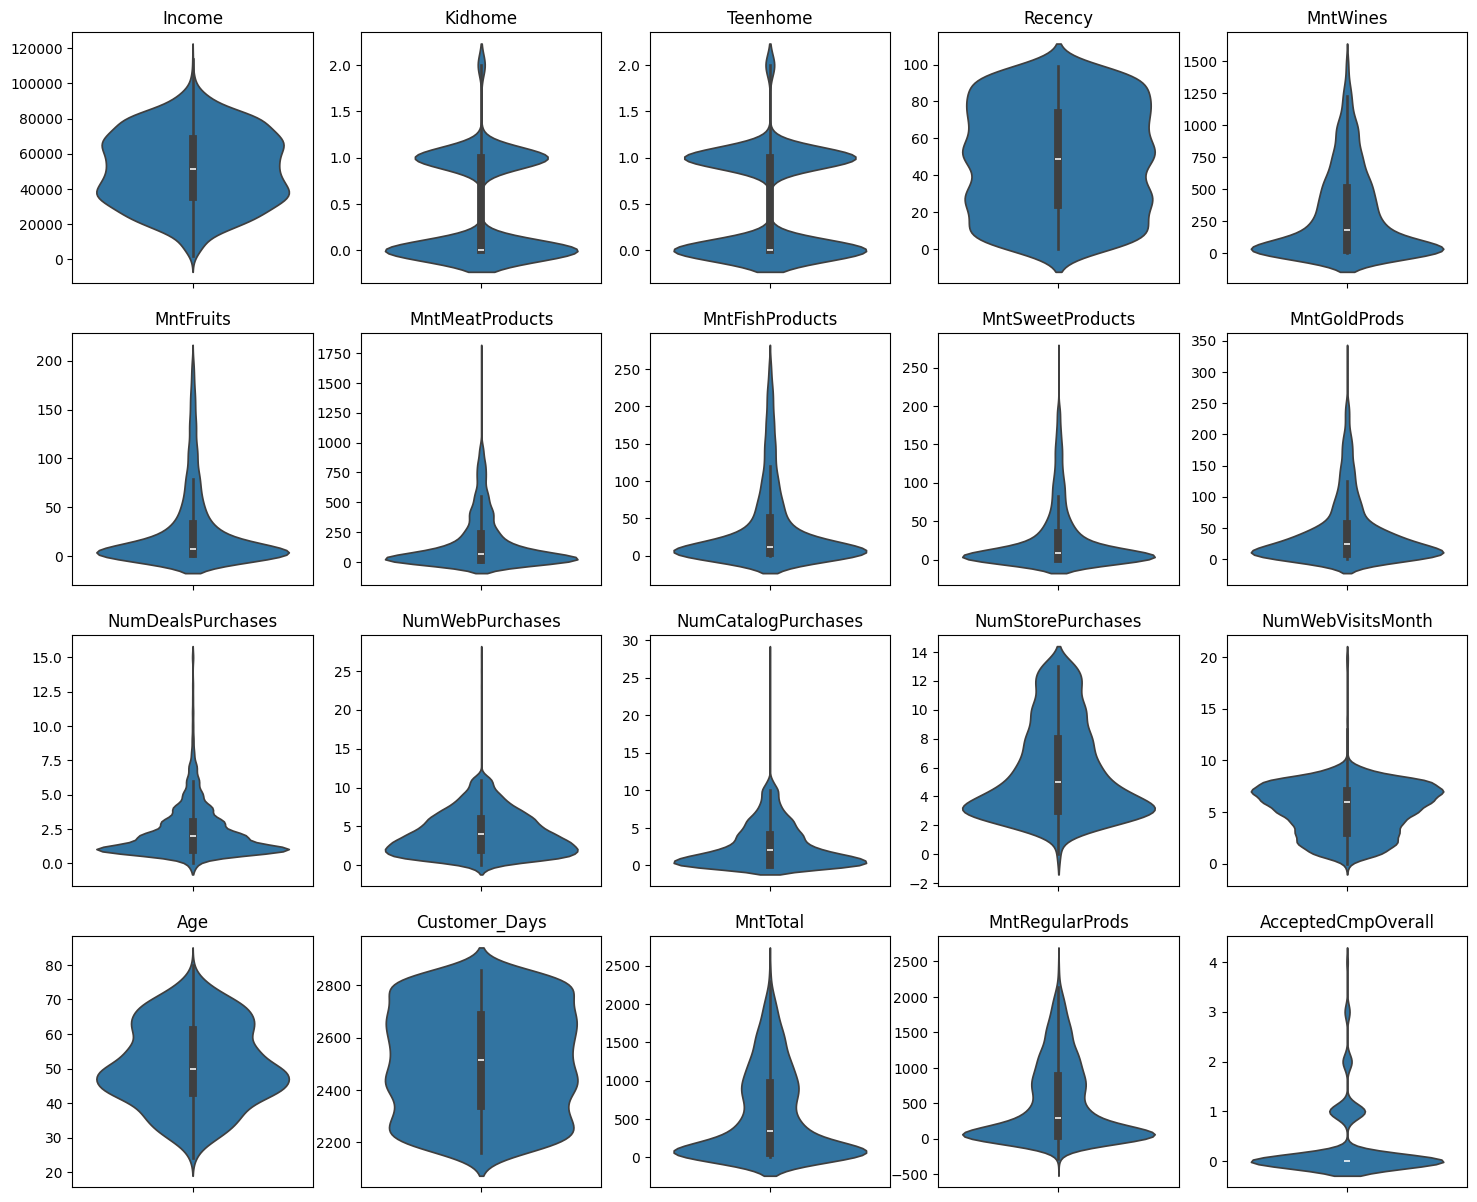

In [16]:
fig, axs = plt.subplots(4, 5, figsize=(18, 15))
axs = axs.flatten()
for i, col in enumerate(numeric_cols):
    sns.violinplot(y = col, data = data, ax=axs[i], orient='h')
    axs[i].set_ylabel("")
    axs[i].set_title(col)
plt.show()

**Nhận xét chi tiết:**

1. **Đặc điểm nhân khẩu học (`Age`, `Customer_Days`, `Income`):**  
   - `Age` và `Customer_Days` phân bố khá đều, thể hiện bộ dữ liệu bao phủ nhiều nhóm tuổi và thời gian gắn bó với công ty, không bị lệch nhiều về một nhóm cụ thể.  
   - `Income` trải dài nhưng tập trung nhiều ở mức thu nhập trung bình – thấp hơn là cao. Điều này gợi ý cần tập trung vào phân khúc thu nhập vừa phải khi thiết kế chiến lược marketing.

2. **Hành vi chi tiêu (`Mnt_*`):**  
   - Các biến `MntWines`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntFruits`, `MntGoldProds` đều phân phối lệch phải. Phần lớn khách hàng chi tiêu ở mức rất thấp, chỉ có một nhóm nhỏ chi tiêu cao.  
   - Điều này cho thấy tồn tại **nhóm khách hàng VIP** (heavy spenders) đóng góp phần lớn doanh thu. Đây là nhóm cần được phân tích sâu và ưu tiên trong các chương trình chăm sóc, giữ chân.
   - Các giá trị chi tiêu cao không phải là lỗi nhập liệu hay bất thường, mà phản ánh **một nhóm khách hàng thực sự tồn tại** – những người có mức chi tiêu vượt trội (heavy spenders).  
    - Đây là nhóm nhỏ nhưng thường mang lại **phần lớn doanh thu** cho doanh nghiệp. Nếu loại bỏ, ta sẽ làm mất đi tín hiệu quan trọng về hành vi và giá trị của nhóm khách hàng này.  
    - Trong bối cảnh marketing và phân tích khách hàng, các giá trị "cao bất thường" chính là thông tin cần thiết để nhận diện **khách hàng VIP** và thiết kế chiến lược cá nhân hóa.  
    - Do đó, thay vì loại bỏ, cần giữ lại các dữ liệu này và sử dụng các kỹ thuật phù hợp (ví dụ: chuẩn hóa dữ liệu, log-transform) để hạn chế ảnh hưởng tiêu cực khi xây dựng mô hình.  


3. **Tần suất mua hàng (`Num*Purchases`, `NumWebVisitsMonth`, `Recency`):**  
   - Các biến như `NumWebPurchases`, `NumStorePurchases`, `NumCatalogPurchases` nghiêng về phía tần suất thấp. Nghĩa là đa số khách hàng mua sắm ít, chỉ một số ít thường xuyên mua hàng.  
   - `Recency` trải dài, có cả khách hàng mua gần đây lẫn khách hàng đã lâu không quay lại. Đây là cơ sở quan trọng để xác định **khách hàng có nguy cơ rời bỏ (churn risk)** và triển khai các chiến dịch kích hoạt lại.

4. **Ý nghĩa kinh doanh:**  
   - Phân phối dữ liệu thể hiện đặc điểm quen thuộc trong marketing: số đông khách hàng mang lại ít doanh thu, số ít khách hàng mang lại nhiều doanh thu.  
   - Doanh nghiệp cần vừa có chiến lược duy trì nhóm khách hàng trung bình (khuyến mãi, giảm giá), vừa có chiến lược đặc biệt cho nhóm chi tiêu cao (ưu đãi VIP, dịch vụ cá nhân hóa).  
   - Kiểu phân phối này phù hợp để triển khai **clustering** (phân cụm khách hàng) hoặc **RFM analysis** nhằm khai thác sâu hơn hành vi và giá trị khách hàng.

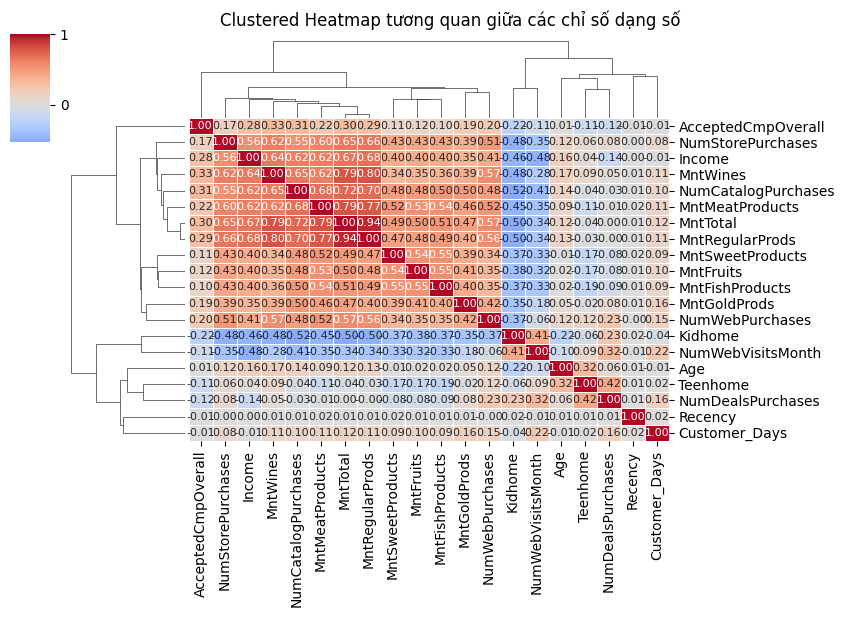

In [17]:
# Tính ma trận tương quan (sử dụng Kendall cho phù hợp với dữ liệu có thể chứa biến nhị phân)
corr = pre_data[numeric_cols].corr(method="kendall")

# Vẽ clustered heatmap với kích thước nhỏ gọn hơn
g = sns.clustermap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_pos=(-0.05, 0.8, 0.05, 0.18),
    figsize=(8, 6),               # giảm kích thước
    annot_kws={"size": 8}         # chữ nhỏ hơn
)

g.fig.suptitle("Clustered Heatmap tương quan giữa các chỉ số dạng số", fontsize=12, y=1.02)
plt.show()


**Nhận xét:**
- Các cột liên quan đến hành vi khách hàng và chi tiêu giữa các loại sản phẩm như `MntWines`, `MntMeatProducts`, `MntFruits`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` có tương quan cao với nhau. Điều này cho thấy khách hàng có xu hướng chi tiêu đồng thời ở nhiều loại sản phẩm thay vì chỉ tập trung vào một nhóm duy nhất.  
- Nhóm có con cháu `Teenhome` hoặc `Kidhome` và nhóm khách hàng lâu năm `Customer_Days` có tương quan cao với `NumDealsPurchases` và `NumWebVisitsMonth`. Đây có thể phản ánh việc các hộ gia đình có con hoặc gắn bó lâu năm thường tận dụng nhiều chương trình khuyến mãi và truy cập web thường xuyên hơn.  
- `NumDealsPurchases` và `NumWebVisitsMonth` có tương quan với `MntTotal` thấp hơn so với các kênh mua hàng trực tiếp như `NumCatalogPurchases`, `NumStorePurchases` và `NumWebPurchases`. Điều này cho thấy việc khách hàng tận dụng khuyến mãi hoặc thường xuyên ghé thăm website chưa chắc dẫn đến tổng chi tiêu cao, trong khi các kênh mua trực tiếp lại đóng góp nhiều hơn cho doanh thu.  
- Đáng chú ý, nhóm khách hàng có `Kidhome` và biến `NumWebVisitsMonth` thậm chí còn có **tương quan âm** với chi tiêu (`MntTotal`). Điều này gợi ý rằng các hộ gia đình có con nhỏ hoặc thường xuyên truy cập website có xu hướng chi tiêu ít hơn, có thể do hạn chế về ngân sách hoặc thói quen tìm hiểu sản phẩm nhiều nhưng ít chuyển đổi thành giao dịch.  

**Hướng phân tích sâu hơn:**
- Kiểm tra xem nhóm khách hàng chi tiêu cao (`MntTotal`) có phải cũng là nhóm có tần suất mua (`Num*Purchases`) và tương tác online cao (`NumWebVisitsMonth`) hay không → hỗ trợ phân loại khách hàng tiềm năng.  
- So sánh hành vi của nhóm có con (`Kidhome`, `Teenhome`) với nhóm không có con để tìm ra sự khác biệt trong tiêu dùng và mức độ nhạy cảm với khuyến mãi.  
- Phân tích riêng từng nhóm chi tiêu (ví dụ: cao, trung bình, thấp) để xem nhóm nào đóng góp chính vào doanh thu và liệu có outlier đặc biệt quan trọng không.  
- Kết hợp thông tin nhân khẩu học (`Education`, `Marital`, `Age`, `Income`) với hành vi chi tiêu để xây dựng chân dung khách hàng rõ ràng hơn cho mục đích marketing.  


#### Đối với các cột kiểu categorical

In [18]:
def col_info(col, array):
    temp = pd.DataFrame(array[col])
    temp = temp.dropna()
    temp = np.array(temp[col])
    data = []
    # num_values
    temp = np.unique(temp, return_counts=True)
    data.append(len(temp[0]))
    # value
    temp = pd.Series(data = temp[1], index = temp[0])
    data.append(temp)
    # num_values
    return data

In [21]:
cat_col_info_df = pd.DataFrame(index = ['num_values', 'value'])
for i in pre_data.select_dtypes(include=['string']):
    cat_col_info_df[i] = col_info(i, pre_data)

cat_col_info_df

,Education,Marital
num_values,5,5
value,2n Cycle 183 Basic 49 Graduation 1015 Master 335 PhD 439 dtype: int64,Divorced 214 Married 785 Single 443 Together 509 Widow 70 dtype: int64


Ta vẽ biểu đồ cột để trực quan sự phân bố các giá trị `categorical`.

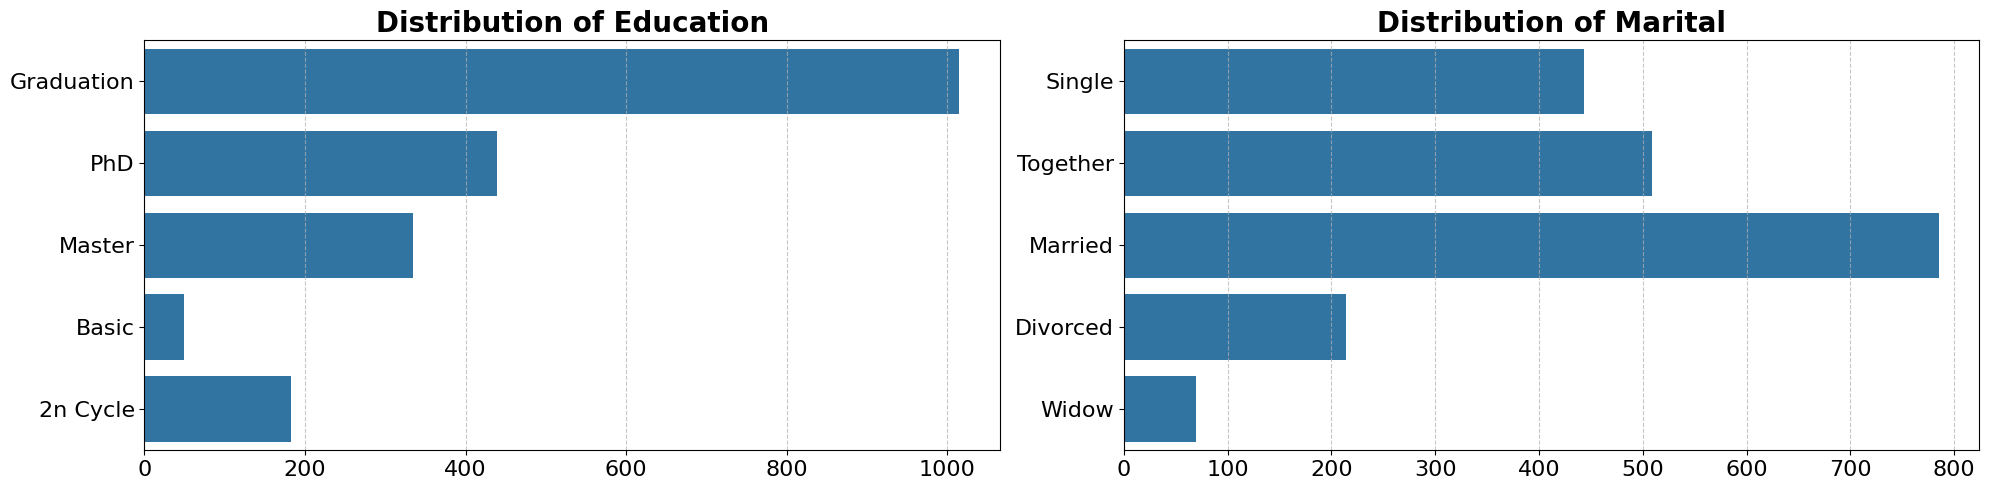

In [26]:
# Lọc các cột kiểu object nhưng không khớp với pattern
object_cols = [col for col in pre_data.select_dtypes(include=['string']).columns]

# Xác định số hàng và số cột cho grid plot
n_cols = 2  # Số cột cố định
n_rows = 1  # Tính số hàng, làm tròn lên

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Điều chỉnh chiều cao theo số hàng
axs = axs.flatten()  # Chuyển thành danh sách 1D để dễ truy cập

for i, col in enumerate(object_cols):
    sns.countplot(data=pre_data, y=col, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}", fontsize=20, fontweight="bold")  # Tăng size chữ tiêu đề
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].tick_params(axis='both', labelsize=16)  # Tăng size chữ các giá trị trên trục
    axs[i].grid(True, axis='x', linestyle="--", alpha=0.7)  # Thêm đường lưới dọc

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)  # Điều chỉnh khoảng cách giữa các hàng
plt.show()

**Nhận xét:**
- Trình độ học vấn - `Education`: nhóm "Graduation" chiếm tỷ lệ lớn nhất, trong khi các nhóm "PhD", "Master", "Basic" và "2n Cycle" có quy mô nhỏ hơn nhiều. Điều này phản ánh thực tế xã hội khi số người tốt nghiệp đại học/cao đẳng phổ biến hơn hẳn so với các trình độ khác.  
- Tình trạng hôn nhân - `Marital`: nhóm "Married" chiếm đa số, tiếp đến là "Together" và "Single", trong khi các nhóm "Divorced" và "Widow" ít gặp hơn. Đây cũng là xu hướng hợp lý trong phân bố tình trạng hôn nhân thực tế.  
- Như vậy, sự lệch phân bố này là **đặc điểm tự nhiên của dữ liệu**, không phải outlier hay sai lệch cần xử lý. Khi phân tích hoặc xây dựng mô hình, cần lưu ý rằng các nhóm nhỏ có thể ít đại diện hơn.

## 3. Khám phá dữ liệu - EDA

### Phần nội dung cho dashboard tổng quan 

## 4. Câu Hỏi Phân Tích Chính

In [ ]:
# --- Câu hỏi phụ 1: ROI ---
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# ROI theo Campaign_Goal
sns.barplot(data=data, x="Campaign_Goal", y="ROI", ax=axes[0])
axes[0].set_title("ROI theo Campaign Goal")
axes[0].tick_params(axis='x', rotation=30)

# ROI theo Gender & Age_Group
sns.barplot(data=data, x="Age_Group", y="ROI", hue="Gender", ax=axes[1])
axes[1].set_title("ROI theo Giới tính & Nhóm tuổi")
axes[1].tick_params(axis='x', rotation=30)

# ROI theo Customer_Segment
sns.barplot(data=data, x="Customer_Segment", y="ROI", ax=axes[2])
axes[2].set_title("ROI theo Customer Segment")
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

In [ ]:
# --- Câu hỏi phụ 2: Conversion Rate ---
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# CR theo Campaign_Goal
sns.barplot(data=data, x="Campaign_Goal", y="Conversion_Rate", ax=axes[0])
axes[0].set_title("Conversion Rate theo Campaign Goal")
axes[0].tick_params(axis='x', rotation=30)

# CR theo Gender & Age_Group
sns.barplot(data=data, x="Age_Group", y="Conversion_Rate", hue="Gender", ax=axes[1])
axes[1].set_title("Conversion Rate theo Giới tính & Nhóm tuổi")
axes[1].tick_params(axis='x', rotation=30)

# CR theo Customer_Segment
sns.barplot(data=data, x="Customer_Segment", y="Conversion_Rate", ax=axes[2])
axes[2].set_title("Conversion Rate theo Customer Segment")
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()
